In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from pyfd3d.nonuniform_grid import *

In [2]:
#need to specify a corase region, a fine region and an intermediate region

In [3]:
# 300x300 grid
Nfine = np.array([100,100,100]); #specify nx, ny for each region
Ncoarse = np.array([50,50,50]);
Ntran =   np.array([50,50,50]); # 2) specify the dx and dy of each region
dx1 = 0.02; dy1 = 0.02;
dx2 = 0.005; dy2 = 0.005;
dz1 = 0.02
dz2 = 0.005
dfine = [dx2, dy2, dz2];
dcoarse = [dx1, dy1, dz1];
dtran = [0,0,0] ## dummy values needed

#stack the vectors
# drt does not have a value...
Nft = np.vstack((Ncoarse, Ntran, Nfine, Ntran, Ncoarse));
drt = np.vstack((dcoarse, dtran, dfine, dtran, dcoarse));

print(Nft, Ncoarse)

[[ 50  50  50]
 [ 50  50  50]
 [100 100 100]
 [ 50  50  50]
 [ 50  50  50]] [50 50 50]


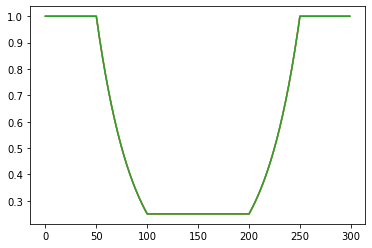

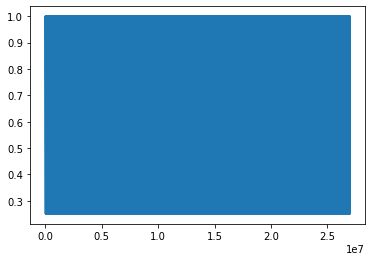

In [4]:
dr_reference  = dcoarse;
[dx_scale, dy_scale, dz_scale] = generate_nonuniform_scaling(Nft, drt/dr_reference);


plt.plot(dx_scale)
plt.plot(dy_scale)
plt.plot(dz_scale)
[DX, DY, DZ] = np.meshgrid(dx_scale, dy_scale, dz_scale, indexing = 'ij')
plt.figure()
plt.plot(DZ.flatten())


In [5]:
dx_scale, dy_scale, dz_scale = generate_nonuniform_scaling(
    Nft, 
    drt, 
)



300 300


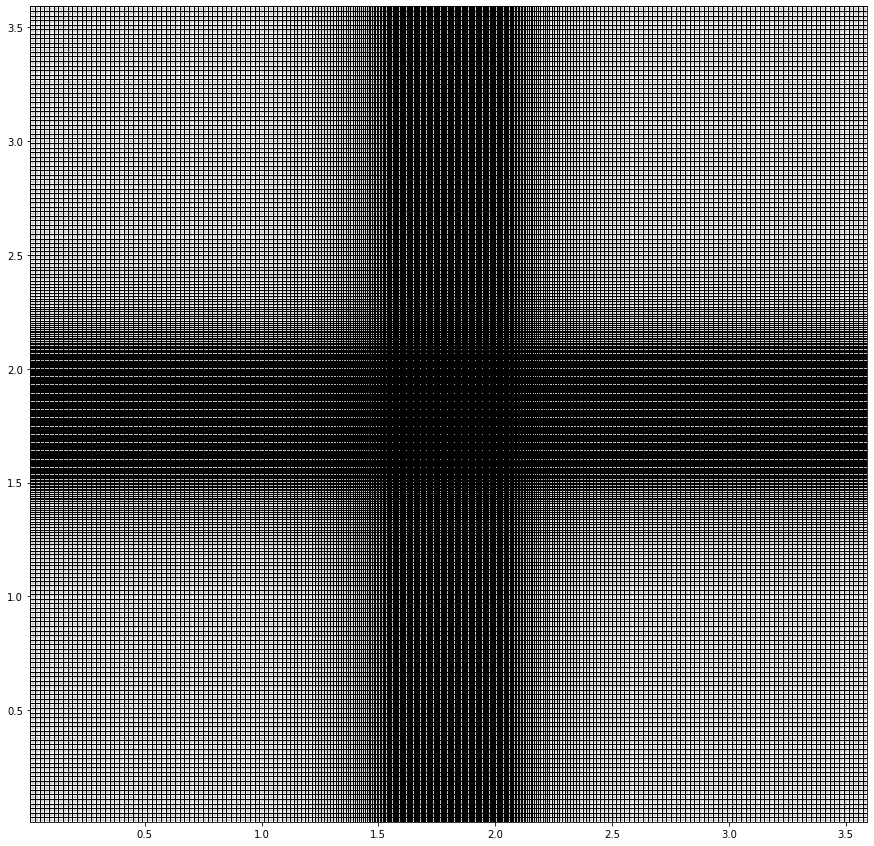

In [12]:
## visualize a 2D slice using a nonuniform grid
xspace = np.cumsum(dx_scale)
yspace = np.cumsum(dy_scale)
print(len(xspace), len(yspace))
xx,yy = np.meshgrid(xspace, yspace)
plt.figure(figsize = (15,15))
grid = 2*np.ones_like(xx)
grid[150, 100] = 1;
plt.pcolormesh(xx, yy, grid, facecolor='none', edgecolor='black',linewidth=1, antialiased=False, shading = 'auto')

for i in xspace:
    plt.axvline(i, linewidth = 0.2, color = 'black')
for i in yspace:
    plt.axhline(i, linewidth = 0.2, color = 'black')
  
# toggle this
#plt.xlim(1, 2)

In [7]:
Fsx, Fsy, Fsz, Fsx_c, Fsy_c, Fsz_c = non_uniform_scaling_operator(dx_scale, dy_scale, dz_scale)

In [8]:
print(Fsx.shape)

(27000000, 27000000)
